# Showcase: Project Ergo

***

### Analysing energy mix to foster the green transition - A case study of 3 different countries 
Group_01: 2612-Advanced Programming for Data Science

***


### Introduction

As our company wants to contribute to the green energy transition, the best team of data scients have compiled an in-depth analysis of the energy in a global cross-contry study. 

- We will kick off with a gapminder plot that will give us a quick overview of the energy landscape.

- Then we will delve deeper into the energy mix patterns and evolution of 3 countries, namely **France**, **USA**, and **India**.

- To finish off we will demonstrate an overall analysis of the energy consumption, population and the GDP across the globe.

***

### Initialization 

Let´s first get our data ready and have a look into our dataframe. 

In [2]:
import sys
from methods.energy_mix import EnergyMix

In [3]:
data = EnergyMix()
data.download_file()
data.enrich_df()

File already exists!


##### Quick Data Exploration
So let´s have a look at the dataset we have just imported and what countries are available for analysis.

In [4]:
data
data.energy_df

iso_code      country  coal_prod_change_pct  coal_prod_change_twh  \
year                                                                           
1970-01-01      AFG  Afghanistan                20.588                 0.228   
1971-01-01      AFG  Afghanistan               -17.683                -0.236   
1972-01-01      AFG  Afghanistan               -47.407                -0.521   
1973-01-01      AFG  Afghanistan                64.789                 0.374   
1974-01-01      AFG  Afghanistan                -1.709                -0.016   
...             ...          ...                   ...                   ...   
2011-01-01      ZWE     Zimbabwe                -3.978                -0.796   
2012-01-01      ZWE     Zimbabwe               -37.800                -7.262   
2013-01-01      ZWE     Zimbabwe                95.419                11.403   
2014-01-01      ZWE     Zimbabwe                85.685                20.010   
2015-01-01      ZWE     Zimbabwe               -25.013               -10.847   

            gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
year                                                                        
1970-01-01                  NaN                  NaN                  NaN   
1971-01-01                  NaN                  NaN                  NaN   
1972-01-01                  NaN                  NaN                  NaN   
1973-01-01                  NaN                  NaN                  NaN   
1974-01-01                  NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2011-01-01                  NaN                  NaN                  NaN   
2012-01-01                  NaN                  NaN                  NaN   
2013-01-01                  NaN                  NaN                  NaN   
2014-01-01                  NaN                  NaN                  NaN   
2015-01-01                  NaN                  NaN                  NaN   

            oil_prod_change_twh  energy_cons_change_pct  \
year                                                      
1970-01-01                  NaN                     NaN   
1971-01-01                  NaN                     NaN   
1972-01-01                  NaN                     NaN   
1973-01-01                  NaN                     NaN   
1974-01-01                  NaN                     NaN   
...                         ...                     ...   
2011-01-01                  NaN                  10.003   
2012-01-01                  NaN                   8.771   
2013-01-01                  NaN                   0.583   
2014-01-01                  NaN                   0.006   
2015-01-01                  NaN                  -0.789   

            energy_cons_change_twh  ...           gdp  wind_share_elec  \
year                                ...                                  
1970-01-01                     NaN  ...  3.271839e+10              NaN   
1971-01-01                     NaN  ...  3.263744e+10              NaN   
1972-01-01                     NaN  ...  2.728279e+10              NaN   
1973-01-01                     NaN  ...  2.806331e+10              NaN   
1974-01-01                     NaN  ...  2.959603e+10              NaN   
...                            ...  ...           ...              ...   
2011-01-01                   4.661  ...  1.830726e+10              0.0   
2012-01-01                   4.496  ...  2.048226e+10              0.0   
2013-01-01                   0.325  ...  2.374258e+10              0.0   
2014-01-01                   0.003  ...  2.474828e+10              0.0   
2015-01-01                  -0.443  ...  2.503057e+10              0.0   

            wind_cons_change_pct  wind_share_energy  wind_cons_change_twh  \
year                                                                        
1970-01-01                   NaN                NaN                   NaN   
1971-0

In [5]:
#we can see we have 9702 rows and 125 columns
data.energy_df.shape

(9702, 125)

In [6]:
#here we can have a look at the first statistics
data.energy_df.describe()

coal_prod_change_pct  coal_prod_change_twh  gas_prod_change_pct  \
count           3638.000000           5458.000000         3.383000e+03   
mean              19.512103             12.945201         2.761729e+14   
std              751.132566            149.405642         1.606320e+16   
min             -100.000000          -1215.337000        -1.000000e+02   
25%               -0.503750              0.000000         0.000000e+00   
50%                0.000000              0.000000         2.255000e+00   
75%                3.273500              0.000000         9.037500e+00   
max            44965.754000           3060.593000         9.342930e+17   

       gas_prod_change_twh  oil_prod_change_pct  oil_prod_change_twh  \
count          3811.000000          3854.000000          3787.000000   
mean             22.256590             7.596015            24.621633   
std             106.345847            84.998948           234.885379   
min           -1054.320000          -100.000000         -2239.737000   
25%               0.000000            -1.404500            -1.857500   
50%               0.199000             0.000000             0.000000   
75%              12.282500             4.652500            14.849000   
max            2112.975000          3242.637000          2790.614000   

       energy_cons_change_pct  energy_cons_change_twh  biofuel_share_elec  \
count             8965.000000             9016.000000         3694.000000   
mean                 4.437799               33.186803            1.265837   
std                 24.988632              259.820239            3.035084   
min                -92.632000            -6083.407000            0.000000   
25%                 -0.583000               -0.062000            0.000000   
50%                  2.481000                0.564000            0.000000   
75%                  6.928000                9.097250            1.125000   
max               1487.995000             6446.809000           32.127000   

       biofuel_elec_per_capita  ...           gdp  wind_share_elec  \
count              3694.000000  ...  6.829000e+03      4807.000000   
mean                 52.697373  ...  6.965562e+11         0.612927   
std                 179.377887  ...  4.804470e+12         2.521774   
min                   0.000000  ...  1.963080e+08         0.000000   
25%                   0.000000  ...  1.416627e+10         0.000000   
50%                   0.000000  ...  5.393730e+10         0.000000   
75%                  21.760500  ...  2.270000e+11         0.035000   
max                2208.133000  ...  1.050000e+14        48.842000   

       wind_cons_change_pct  wind_share_energy  wind_cons_change_twh  \
count           1253.000000        3607.000000           3595.000000   
mean             380.642315           0.233059              1.555845   
std             7585.685697           1.030027             12.144201   
min             -100.000000           0.000000            -10.409000   
25%                4.364000           0.000000              0.000000   
50%               24.520000           0.000000              0.000000   
75%               58.847000           0.010500              0.007000   
max           242384.843000          18.412000            305.767000   

       wind_consumption  wind_elec_per_capita  wind_energy_per_capita  \
count       3608.000000           5656.000000             3608.000000   
mean           9.345525             26.542629               92.734921   
std           77.087992            131.723814              393.157539   
min            0.000000              0.000000                0.000000   
25%            0.000000              0.000000                0.000000   
50%            0.000000              0.000000                0.000000   
75%            0.079000              0.175000                2.434500   
max         2103.669000           2483.874000             6284.652000   

          year_int     emissions  
count  9702.000000  3.60

In [7]:
#however, as we want to analize the different countries even further, let´s check which ones are in our dataset.
data.unique_column_values()

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia Pacific',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'CIS',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Central America',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Eastern Africa',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',

***

### Overview: gapminder

The gapminder method outputs a plot which visualizes the energy consumption in terawatt hours in relation to the GDP in US Dollar and the population for the World. The features energy_consumption as well as GDP are scaled on a natural logarithm,
since the data has a lot of outliers. This allows the user of this notebook to see an overall trend, but for a detailed number please hover over the country and it will show you the exact numbers.

The data will be filtered on the year, which the user inputs. For this explanation we took the year 2015 and 1990.


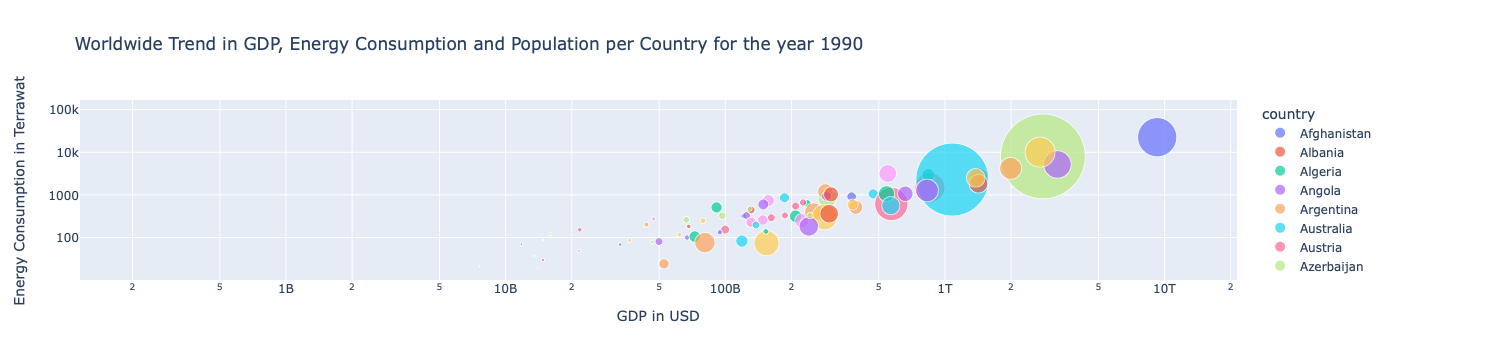

In [8]:
data.gapminder(1990)

For the year 1990 we can see a positive correlation/trend between both, the GDP and the primary_energy consumption. The higher the GDP, the higher the primary_energy_consumption and visa versa.
We can see that there is a wide spread in the data. The lowest country is Sao Tome with a GDP of 218 million USD and an energy consumption of 0.279 terrawat.

In comparison you can see the highest State, the United States, with a GDP of 9 trillion USD and a primary energy consumption of 22.498 k terrawat.

For the third variable the population we can also see a positive trend. Meaning, that the higher the GDP and energy_consumption the higher the population. 
This is especially true for the left half of the graph, but showing some outliers on the right half, wihch makes a lot of sense, since smaller but developed states consume more energy as an industrial or emerging country with a high population.

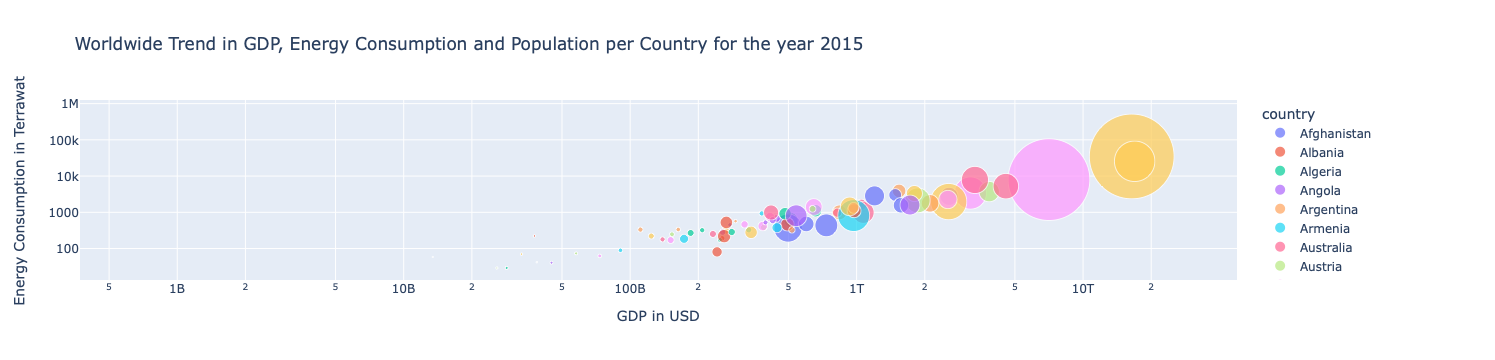

In [9]:
data.gapminder(2015)

In comparison to 1990 we can see in year 2015 an increase from countries with lower GDP to a higher GDP. We could reason that for example, with an overall increase in wealthfare, due to international trade agreements and technology innovations.
Furthermore we can also see an increase in population. Overall the positive correlation between these three features stays.
Also some countries changed in their position. But the next part of the analysis, will go into more detail of each country

*** 

### Country Analysis



For the country analysis we chose three relevant countries: France, the United States and India.\
<br>
We chose France, as a member of the EU, to analyze the effect of the EU's proposed carbon tax and checkout the impact it would potentially have on the carbon emmissions.\
<br>
The energy mix of the United States is relevant to study because the United States is one of the largest energy consumers in the world. The USA's GDP is also the largest in the world, so it is relevant to study it among other countries to see how it compares to its energy mix.\
<br>
To finish with, as the gapminder outlined, India is one of the rising largest energy consumers in the world, and its energy mix is expected to play a significant role in meeting the country's energy needs in the future. India has a large population and a growing economy, which are both factors that contribute to the country's high energy demand. India's energy mix is also expected to change in the future as the country looks to increase its use of renewable energy sources.\
<br>
The United Nations has set the goal to decarbonise by 2050 in order to prevent the worst effects of climate change. Decarbonisation will help to reduce greenhouse gas emissions and slow the rate of climate change. So let's get to the analysis of France, United States and Indias' energy consumption and emission to understand the relationship between these two. With the goal of later on provide with potential recommendations for decarbonization to comply to the UN's goals. 

##### **France**

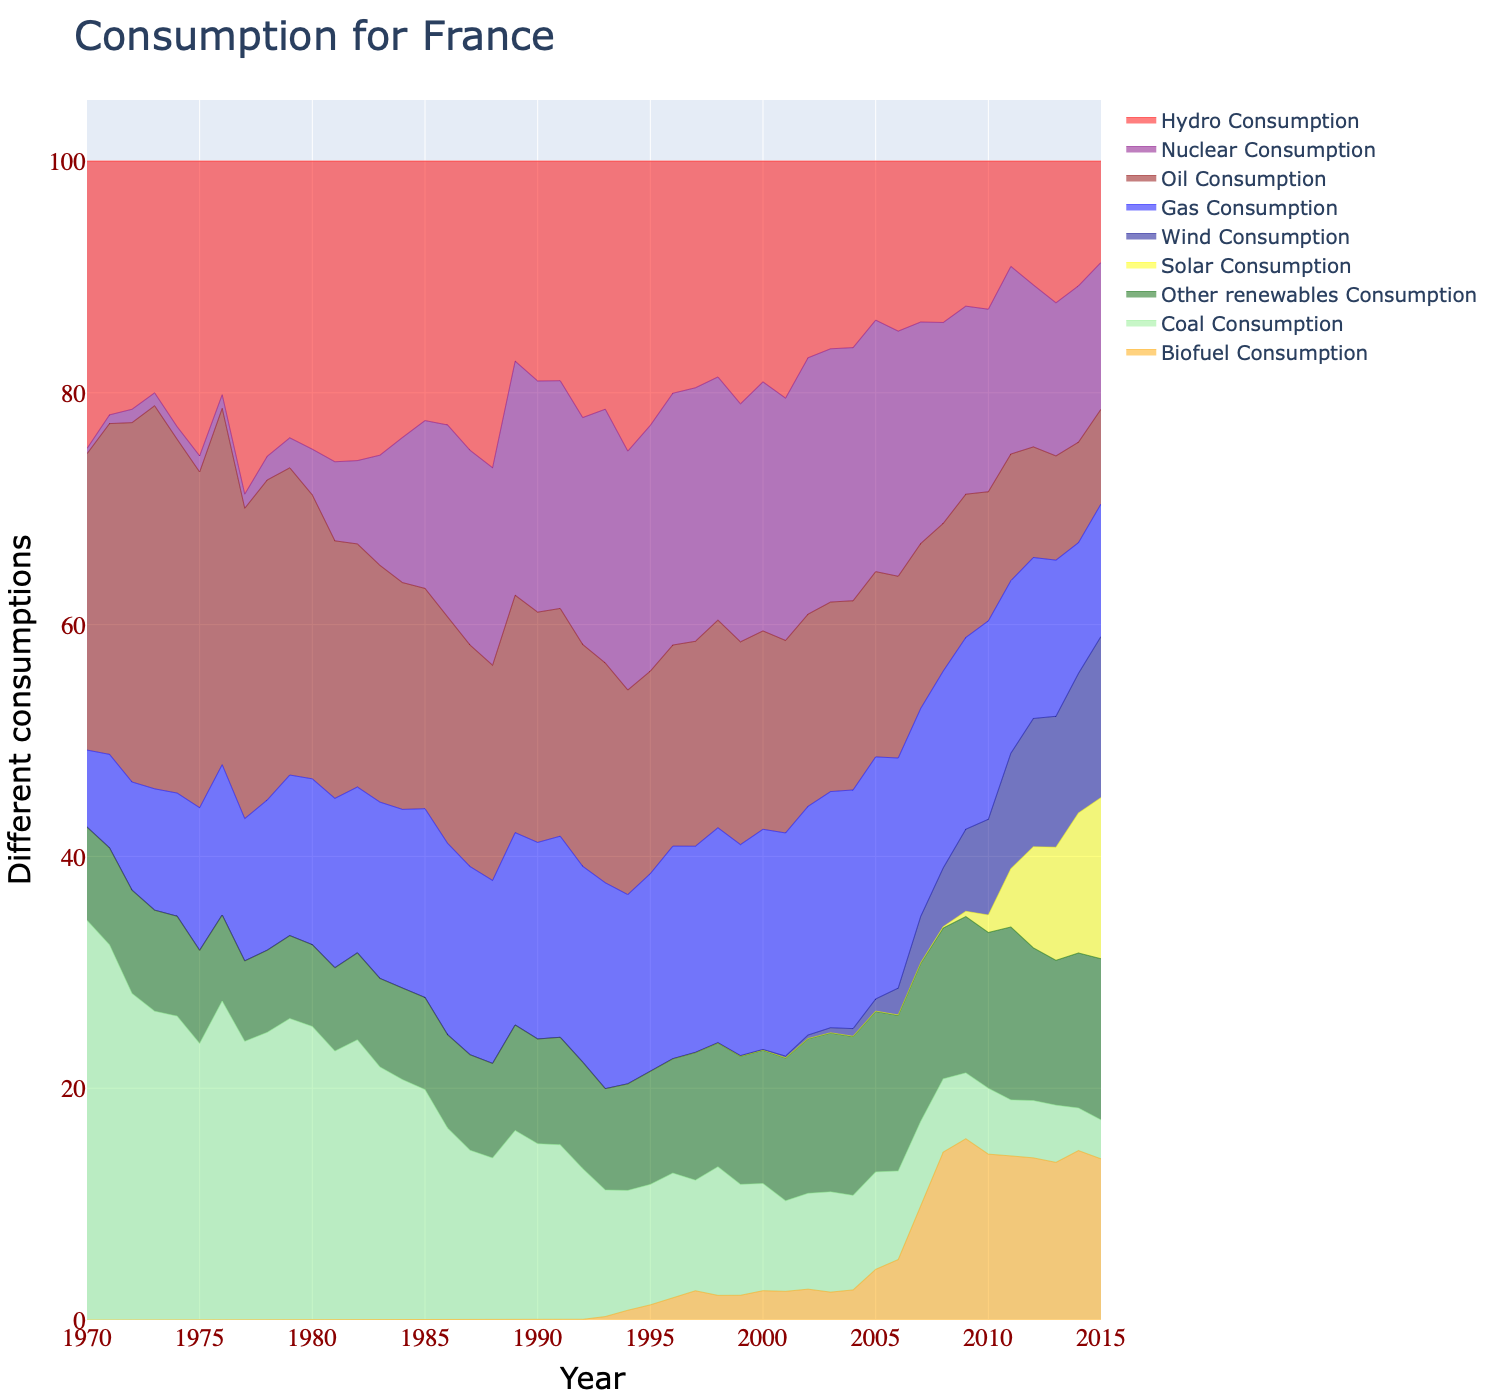

In [10]:
data.plot_area("France")

This plot shows us the different energy consumption types, which France has and how they changed over time. 
Overall we can see that most of the switches in energy consumption happend after 1980 and before 1990 and stayed constant for the rest of the time.
We can see from 1980 to 1990 a decrease in fossil_fuel and oil, but therefore an increase in nuclear and low_carbon. Reasons for that could be the trend for more environmentally friendly energy production and consumption.
If we look at the whole picture between 1990 and 2015 all the consumption types stayed the same. 
The ratio is approximately nuclear, low_carbon, oil and wind equally with 10%, primary_energy consumption with 30% and  the rest is split into minor groups.

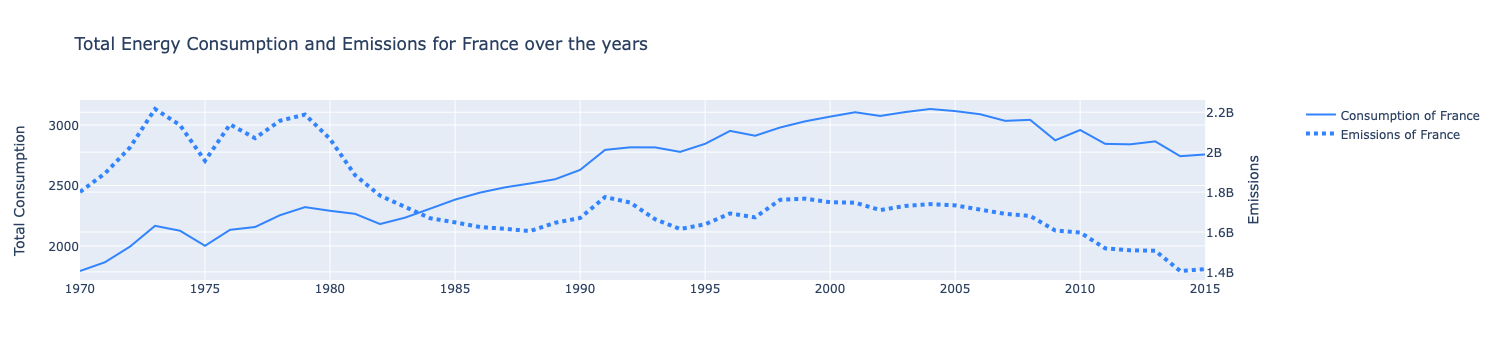

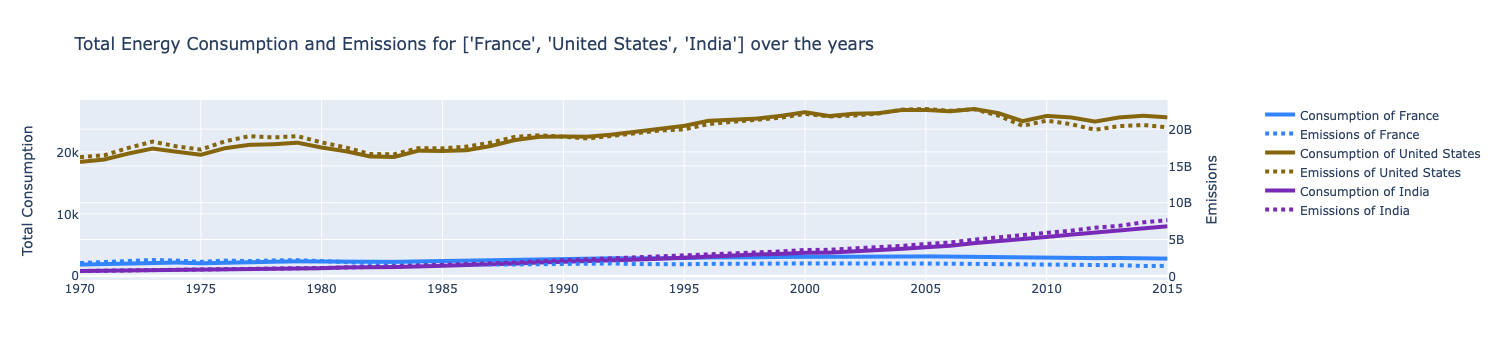

In [13]:
data.plot_totalconsumption_emission("France")
data.plot_totalconsumption_emission(["France", "United States", "India"])

This first linegraphs shows the evolution between 1970 and 2015 of the **total consumption** of **France**. We can see that there is a **positive trend**, 
showing an increasing consumption from 1792 terrawat per year in 1970 to 3115 terrawat per year at the highest point in 2005. Afterwards the consumption declines to 2756 in 2015.
The decline could be explained by technology innovations and better material, which require less energy. E.g. better isolation.
If we take countries like the USA and India into the plot, the increase of France, looks minimimal, but similar to other countries in Europe like Germany. 
India instead has a sharp increase, coming from 2000 terrawat a year in 1990 to 26000 in 2015. Overtaking France in 1995.
Also, if we compare France to the United States, the increase seems very small. The USA are increasing their overall consumption from 55000 to 80000 terrawat a year.
<br>

On the other hand, when we visualize **France's emissions** they have **clearly declined** over the same period. In 1970, France emissions were up to 1.8B showing an increasing emissions until 1979, with the highest level in 1973 being of 2.2B per year. Afterwards the emissions declined to 1.4B in 2015. 
<br>
It's especially interesting to note the cross point in 1984 where France's energy consumption got more important that its emissions.
It also seems that since 1988 France's energy consumption and emission followed comparable trends at the same pace. We can easily spot the pick of both consumption and emissions in 1991, 1996, 2008.\
<br>
There are a number of reasons for this. France's population has grown significantly since 1984, and as a result, the country's energy consumption has increased. Additionally, France has become increasingly industrialized since 1984, which has also contributed to higher energy consumption. France has been also increasingly relying on imported energy sources in recent years, which has further contributed to higher energy consumption levels.\
Since 1984, France's energy emission has decreased because the country has been investing in renewable energy sources, improved its energy efficiency and made some changes in its energy mix during this decade. Additionally, France has made a commitment to reducing its greenhouse gas emissions, which may have contributed to the decrease in energy emissions.\
<br>
When compared to the United States and India, France's comsumption and emissions are by far the lowest today but it was not always the case as we see it was consuming more and emitting more than India before 1990. A true shift happened in 2001 as we see that France is the only of these 3 countries having clear steady decrease in both emission and consumption.

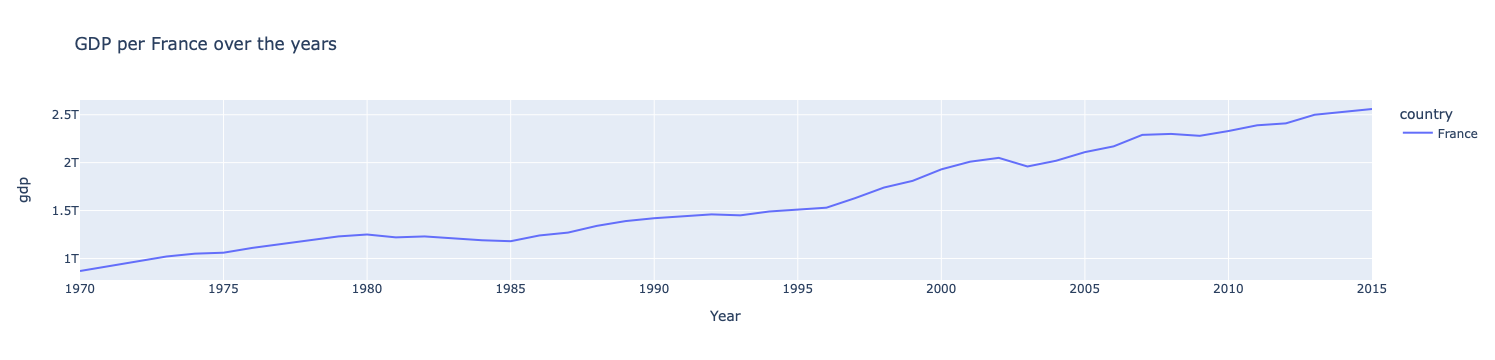

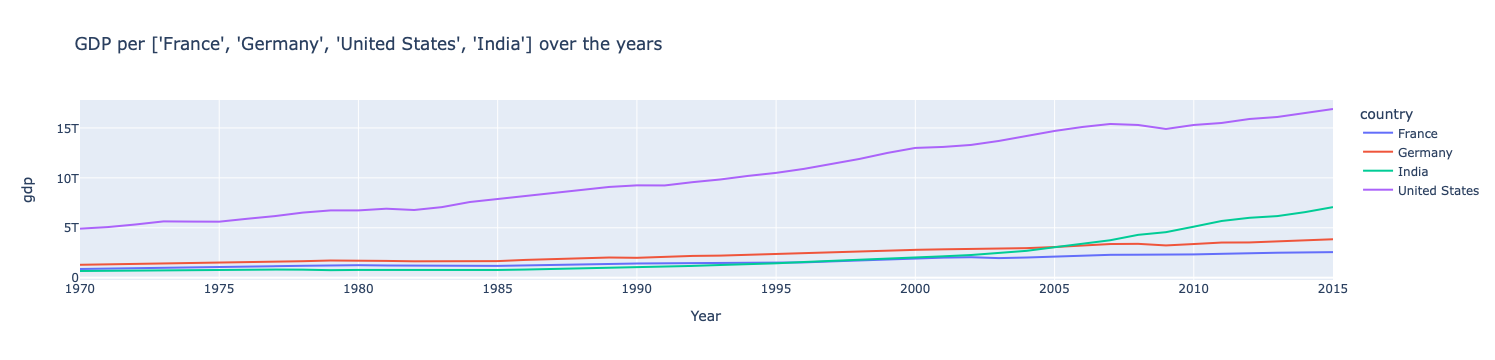

In [14]:
data.country_gdp("France")
data.country_gdp(["France", "Germany", "United States", "India"])

This graph show the evolution of the GDP per country from 1970 to 2015. On the first view we can already see a very sharp rise in GDP. It more than doubled.
If we compare that to our findings from the consumption part, we can see a positive correlation in both. 

When we compare France again to the countries Germany, the USA and India, we can see similarities to the Graph above. The increase of France and Germany is again way smaller than of America and India.
A reason for the overall increase could be the overall increase in wealthfare due to trade agreements and technology innovations.

Therefore this increase in GDP could be correlated among with the other variety of potential explanations for this increase in energy consumption but decrease in emission. One possibility is that it reflects a general increase in the standard of living in France over this time period. As people become wealthier, they tend to consume more energy. Another possibility is that it reflects changes in the structure of the economy, with a shift away from manufacturing and towards service industries. This would lead to a reduction in energy consumption, as service industries are generally less energy-intensive than manufacturing.

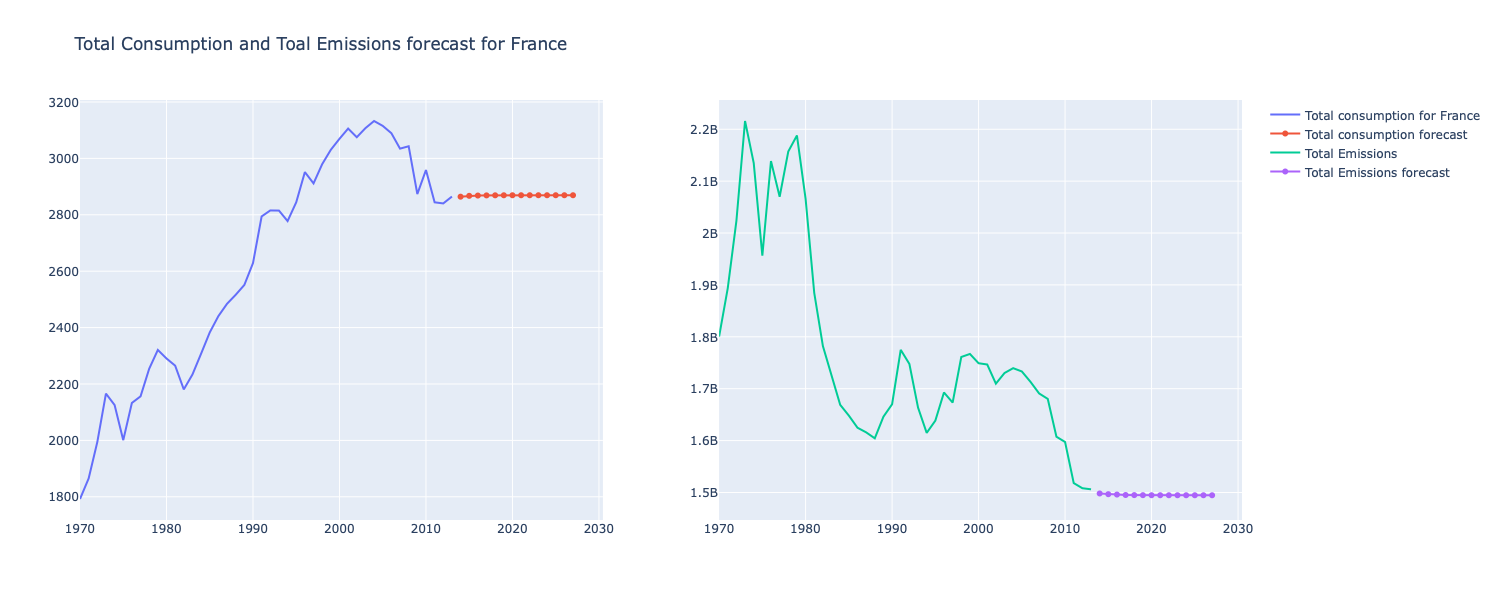

In [15]:
data.forecast_arima('France', 10)

So far we acknowledge France's **consumption has significantly increased** since 1970 whereas its **emissions have significantly decreased**. But when we have a look at our forecasts we noticed that: 


For the next five years after 2015, consumption is forecasted to remain steadily high but with no significant variations (round about 2.8k during the period).

For the next five years after 2015, emissions are forecaster to remain steadily low but with no significant variations (round about 1.49B during the period).

There is no significant change in either consumption or emissions forecast for the next five years because both are expected to remain relatively steady during this period. This is likely due to the fact that there are no major changes or shifts anticipated in either the economy or in energy use during this time.

##### **USA** 

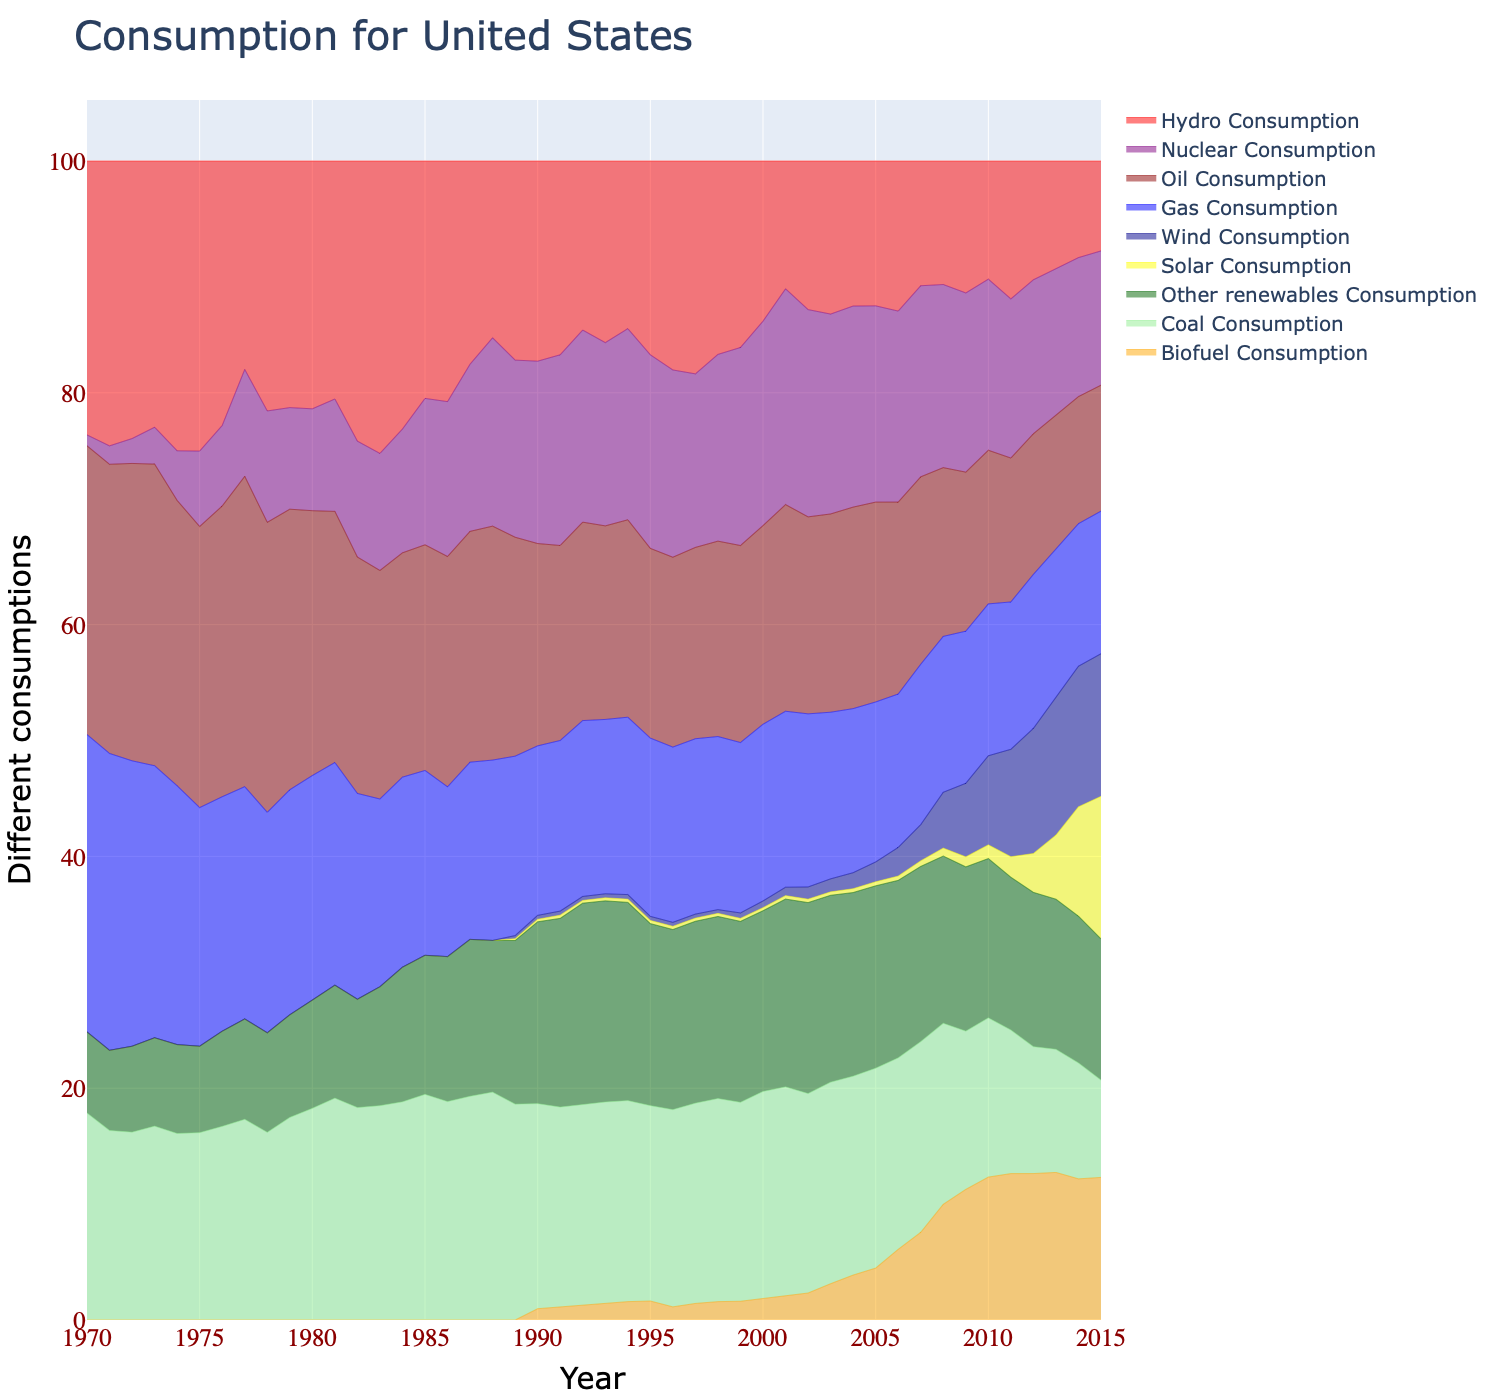

In [16]:
data.plot_area("United States")

When looking at the energy consumption of the United States, it can be seen that the consumption of the different energy sources has been fairly constant over the period from 1970 to 2015. Major energy sources, primarily oil, wind, and fossil fuels, account for about 60% of total energy consumption, while solar energy accounts for only about 5% of total energy consumption. A slight increase in consumption over time can be seen for biofuel, nuclear, and wind energy. This can be placed in a general trend toward environmentally friendly energy sources. All three sources are environmentally friendly alternatives to fossil fuels or coal - even if nuclear energy is not without controversy. 

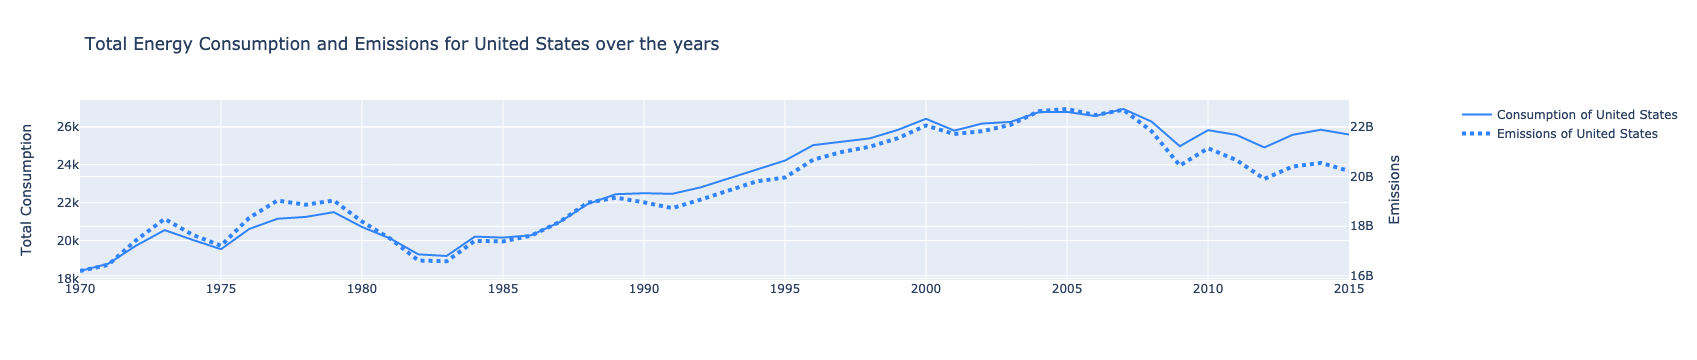

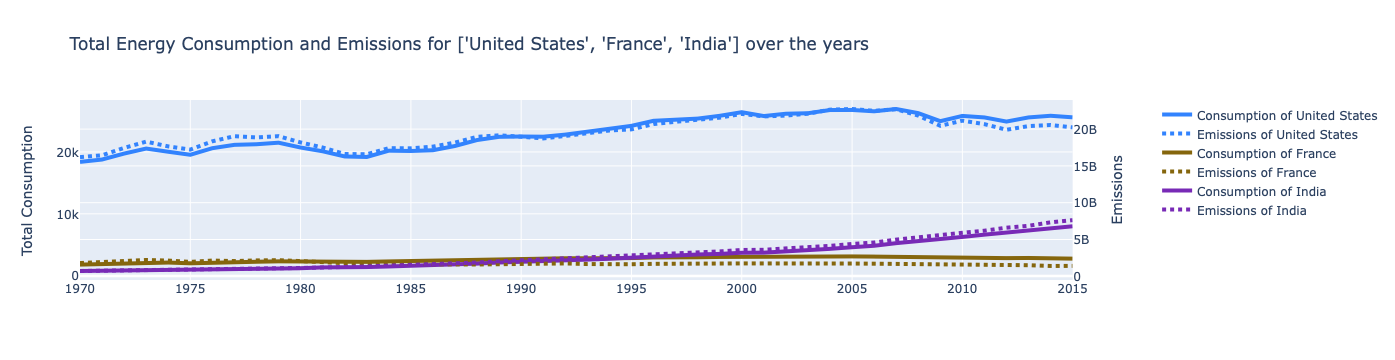

In [17]:
data.plot_totalconsumption_emission("United States")
data.plot_totalconsumption_emission(["United States", "France", "India"])

The first linegraph shows the evolution between 1970 and 2015 of the **total consumption** of **the United States**. We can see that there is a **positive trend**, 
showing an increasing consumption from 18.4k terrawat per year in 1970 to 26.9k terrawat per year at the highest point in 2007. Afterwards the consumption declines to 25.6k in 2015.The analysis of the energy consumption of the USA shows a volatile but overall increasing energy use in the period from 1970 to 2015. Especially the years between 1970 and 1985 show a comparatively high volatility.

The global economic recession is the most likely the cause for the decline in energy consumption in the United States from 2007 to 2015.
If we comapre the United States with countries like France and India, both american consumption and emissions are dominant. France's and India's consumptions and emissions looks minimimal in comparision. There's a clear gap between the United States and the two other countries
<br>

On the other hand, when we visualize **the United States' emissions** they have also **clearly increased** over the same period. In 1970, in the US emissions were up to 16.2B showing increasing emissions with the highest level also in 2007 being of 22.7B per year. Afterwards the emissions declined to 20.2B in 2015.

It's especially interesting to note the United States' energy emission and consumption are following the same trend since 1970 because the United States is a developed country with a large economy and a high population. The United States uses a lot of energy to maintain its high standard of living and to grow its economy.

There had been 3 periods where emissions were larger than consumption: from 1971-1981; from 1986-1988; from 2004-2007. Most likely because after 1981 rose the use of nuclear energy. But also because in 1989 were introduced to energy mixes solar and wind energies. And also oil and coal decreased since since 2008. 

<br>
The United States is the largest economy in the world, and its energy consumption has historically been correspondingly high. While other countries' energy consumption has grown more rapidly in recent years, the US remains the clear leader. The United States also has a high per capita energy consumption.

<br>
When compared to France and India, the United States's comsumption and emissions are by far the highest at the end of the period and it always been the case as we see it since 1970. 

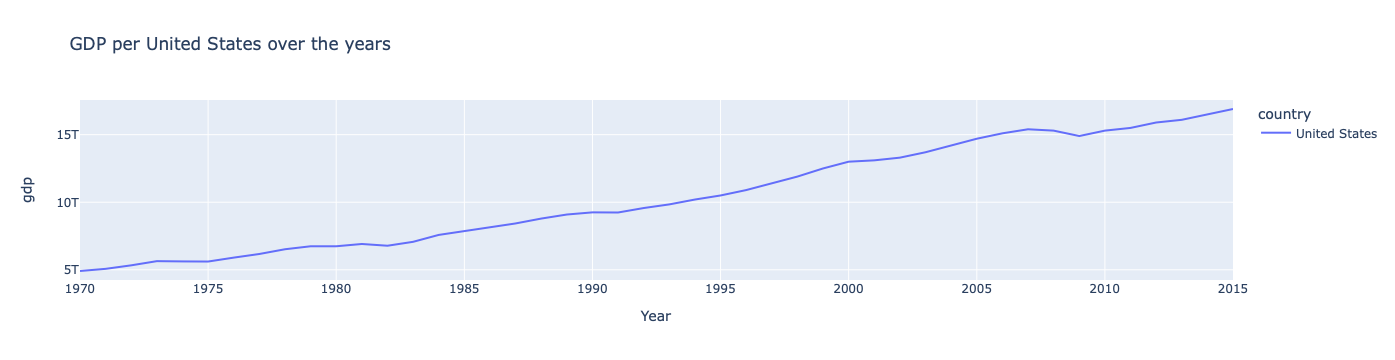

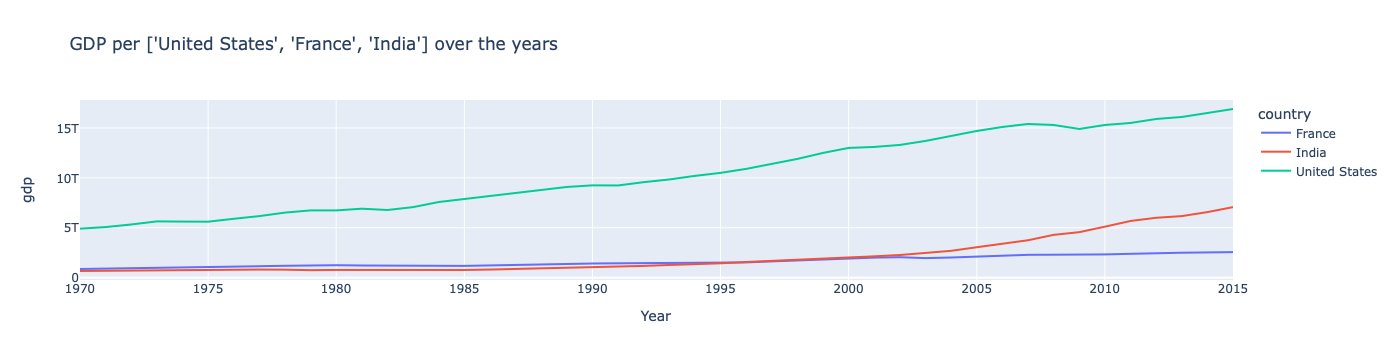

In [20]:
data.country_gdp("United States")
data.country_gdp(["United States", "France", "India"])

As noted for France, U.S. GDP more than tripled in the period from 1970 to 2015. The GDP rose from 4.9T USD  in 1970 to over 16T USD  in 2015. This can be attributed to a strong economy, a thriving tech sector, and continued independence from other nations. A positive correlation to the increase in energy consumption can again be detected. 

For a comparison to the US, Germany & India, please refer to the analysis part of France.

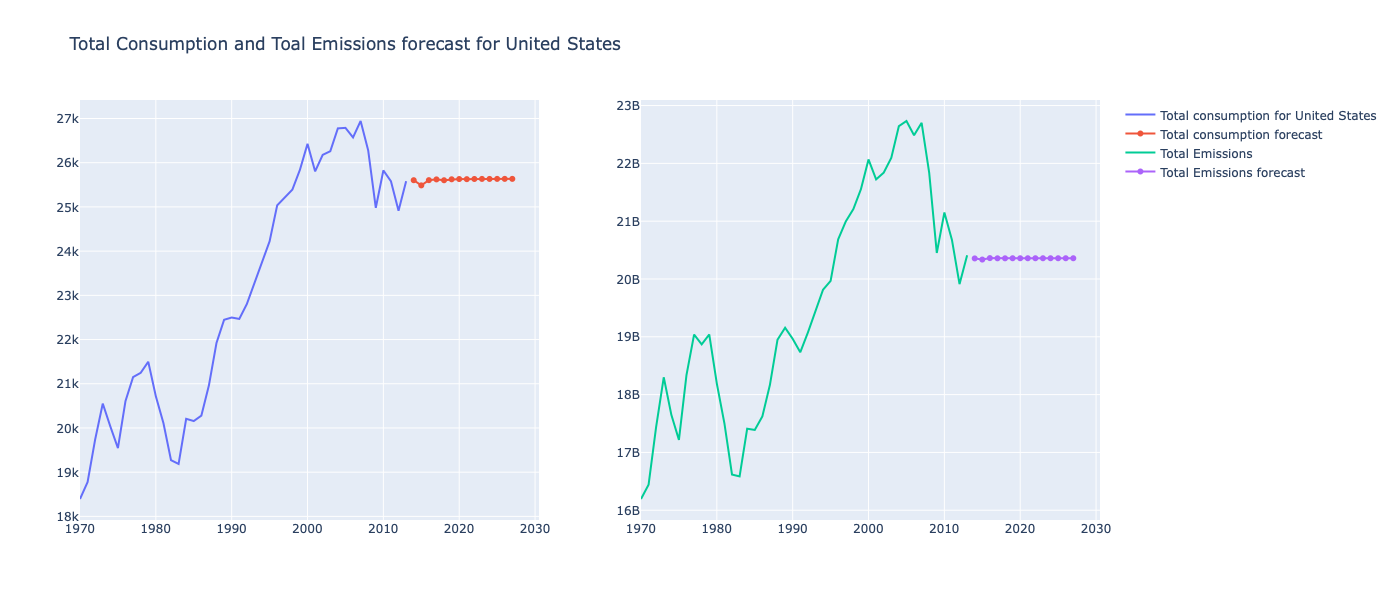

In [21]:
data.forecast_arima('United States', 10)

So far we acknowledged the United States' **consumption has significantly increased** since 1970 together with its **emissions**. But when we have a look at our forecasts we noticed that: 

For the next five years after 2015, consumption is forecasted to remain steadily high but with no significant variations (round about 25.6k during the period).

For the next five years after 2015, emissions are forecaster to remain steadily high but with no significant variations (round about 20.35B during the period).

There is no significant change in either consumption or emissions forecast for the next five years because both are expected to remain relatively steady during this period. Like France, this is likely due to the fact that there are no major changes or shifts anticipated in either the economy or in energy use during this time.

##### **India** 

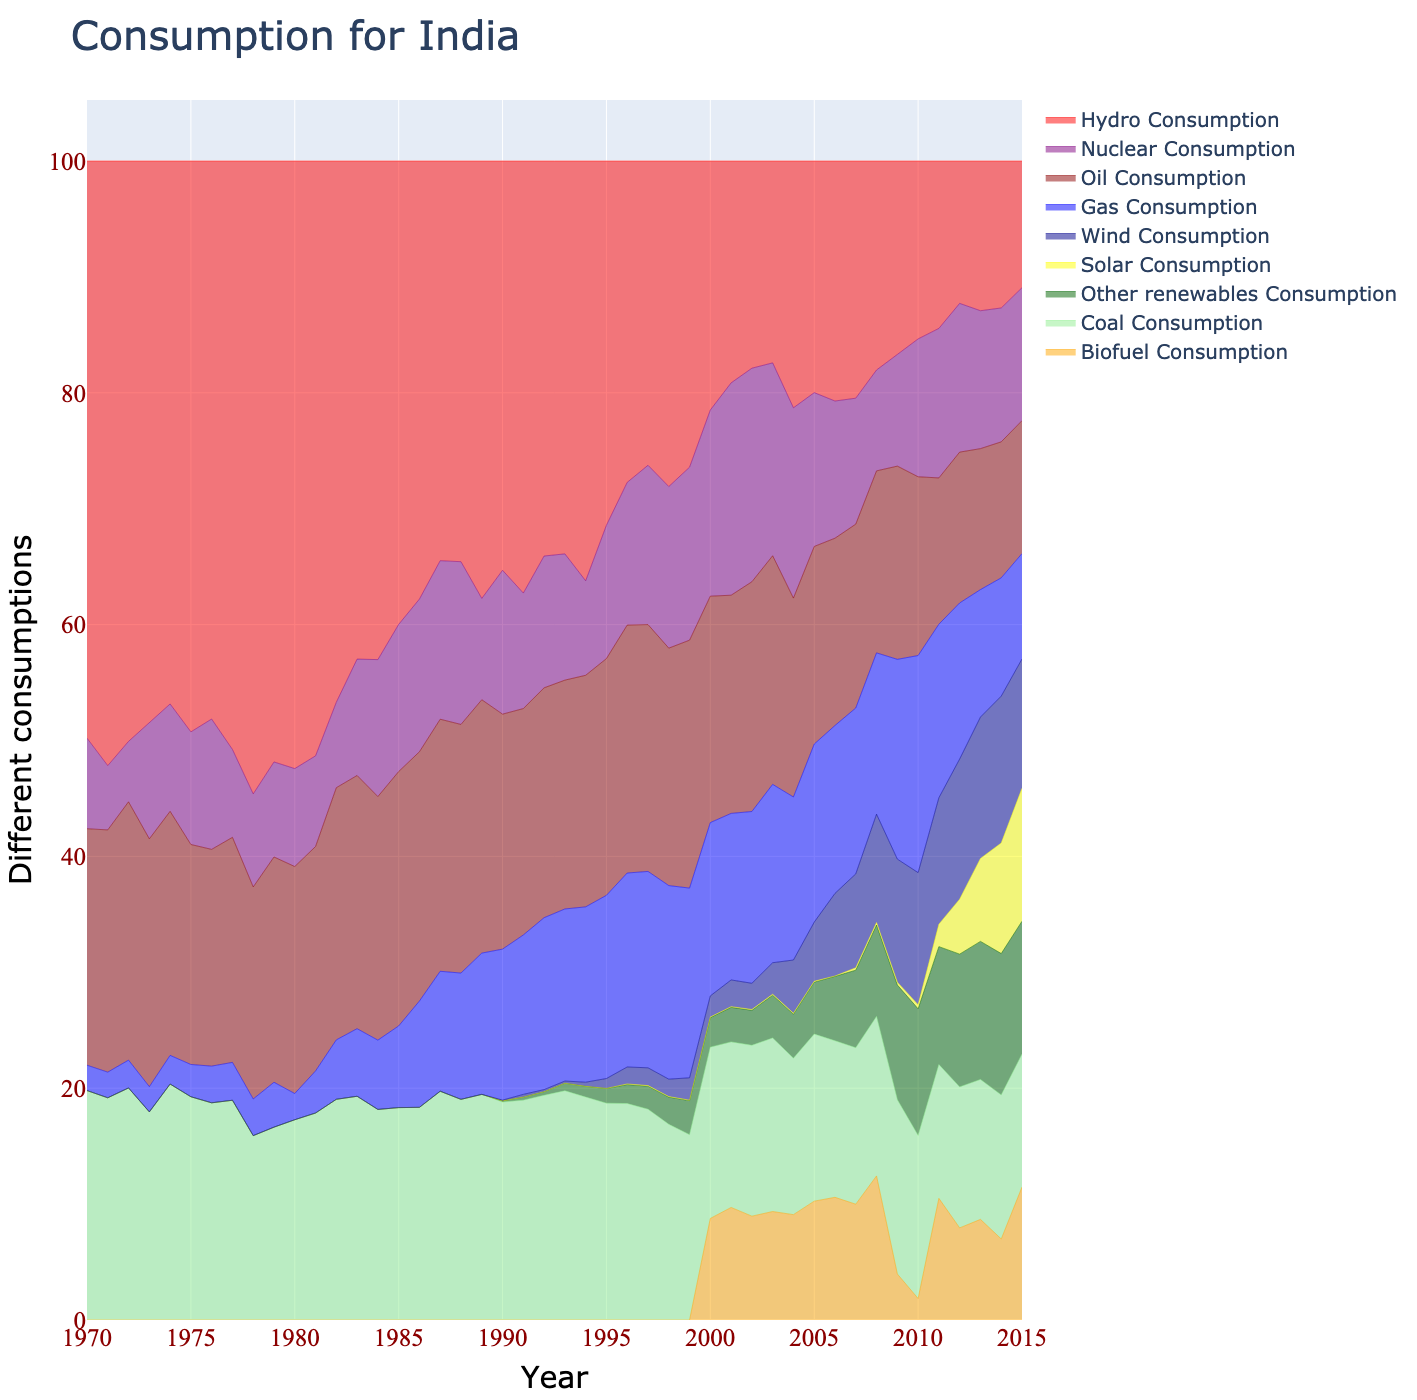

In [22]:
data.plot_area("India")

This area plot shows us the different energy consumption types, which India has and how they changed over time. Overall it can be seen that the consumption of the different energy sources has been fairly constant over the period from 1970 to 2015. We can also see that the only major visible switch has occured in 1979. India's major energy sources are primary oil, fossil fuels, hydro and coal, accounting for about 80% of total energy consumption gas (even though its consumption increased over time) still accounts for less than 1% of India's total energy consumption. On the other hand, hydro consumption decreased together with carbon of about 50% since 1970. Other renewable enrgies are still quite low (less thant 0,1%) of India's total energy consumption. However considering India is one of the world’s fastest-growing major economies, we can imagine that India will be vital for the future of the global energy markets.

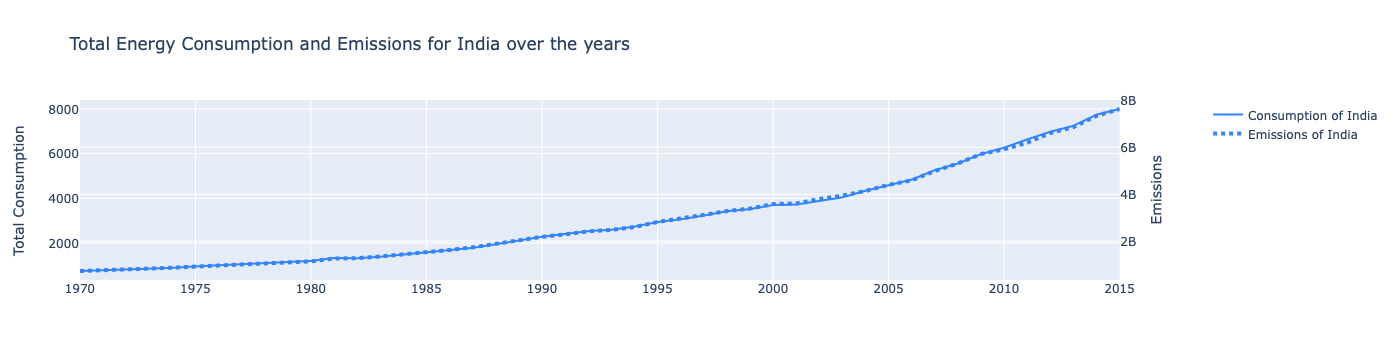

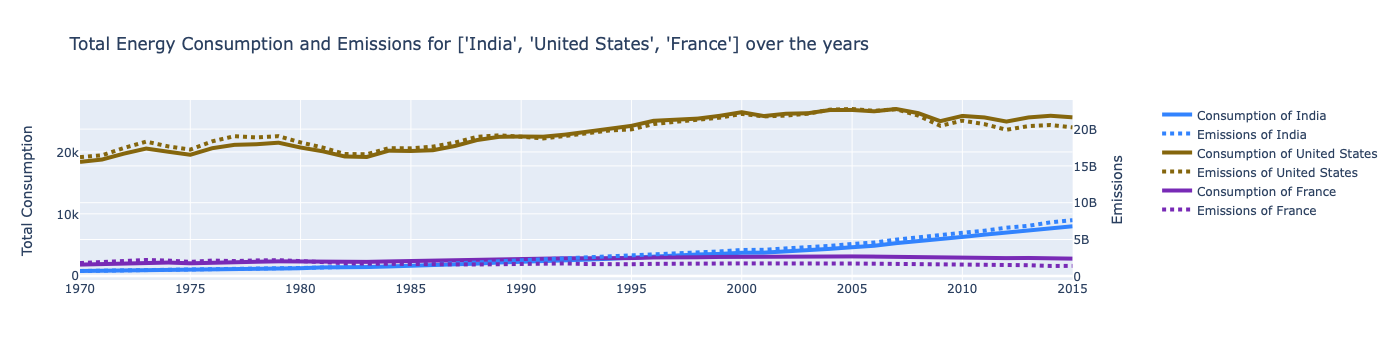

In [23]:
data.plot_totalconsumption_emission("India")
data.plot_totalconsumption_emission(["India", "United States", "France"])

This first linegraph shows the evolution between 1970 and 2015 of the **total consumption** of **India**. We can see that there is a **positive trend**, 
showing an increasing consumption from 1910 terrawat per year in 1970 to 8k terrawat per year at the highest point in 2015. India's total consumption significantly increase linearly, it was 4 times consuming more in 2015 than it was in 1970. 

There are a number of factors that contribute to India's energy consumption linearly growing since 1970. As the population of India has increased, so has the demand for energy. Additionally, India's economy has been growing rapidly since 1970, which has led to increased energy consumption. Additionally, the industrial sector in India has been growing rapidly, which has also contributed to increased energy consumption.

If we take countries like the USA and France into the plot, the increase of India, is slow but constant and looks minimimal but outgrew europeans country to get closer to the US's levels. India instead has a sharp increase, coming from 2k terrawat a year in 1990 to 8k in 2015. Compared to other countries we truly do see India's increase in consumption started in 1994, when India'consumption got more important that France's following with 2003 when India's consumnption outbeats Germany's consumption.  Especially, as a developing countries, India's inhabitant for many years had inequal access to basic utilies (water,gas, electricity). 
However we see that it's during the last 10 years that India increased the energy intensity of its economy by close to 50% compared to 2005 levels. Still far from the USA's consumption levels but considering the number of total habitant we can deduce that ensuring Indian citizens to have access to electricity has been at the top of the country’s political agenda and we can expect the consumption to keep on increasing in the future. Also, if we compare India to the United States, it seems that in the future their energies consumptions and emissions would be to similar levels.
<br>

On the other hand, when we visualize **India's emissions** they have **clearly followed the same increasing trend as consumption** over the same period. In 1970, India's emissions were up to 1971M showing an increasing emissions with the highest level in 2015 being of 7.6B per year.

<br>
There's no significant time periode where emissions where larger than India's consumption.
There are a number of reasons why India's energy consumption and emissions have been growing since 1970. India is a rapidly industrializing country, and as such its energy needs have been growing steadily. Additionally, India has a large population, which means that even small increases in energy consumption can result in large increases in emissions.Finally, many of the energy sources that India relies on are relatively inefficient, which means that more energy is required to produce the same amount of power, leading to higher emissions. Finally, India has a large number of coal-fired power plants, which are a major source of emissions.

<br>
When compared to the United States and France, India's comsumption and emissions are in the middle in 2015 but it was not always the case as we see it was consuming less and emitting less than France before 1990. A true shift happened in 2001 as we see that India's energy's consumption and emissions got about 3 times more important.

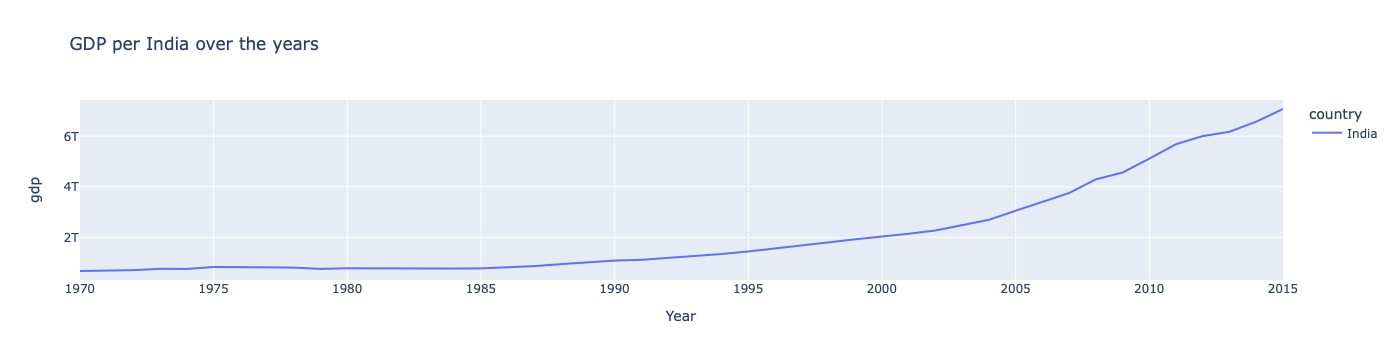

In [25]:
data.country_gdp("India")
data.country_gdp(["India", "France", "United States"])

This graph show the evolution of the GDP per country from 1970 to 2015. On the first view we can already see a very sharp rise in GDP. It increased also by abound 10 times since 1970.
We also notice that in 2005 India's GDP boomed and it seems that India from then it has the institutional framework it needs to attract more investment for its growing energy needs. It even surpassed France and Germany but still remains below the american's. We definitly can see a correlation between the GDP and total energy consumption. Indeed with a population of 1.4 billion and one of the world’s fastest-growing major economies, we can expect India to get closer to the American levels.


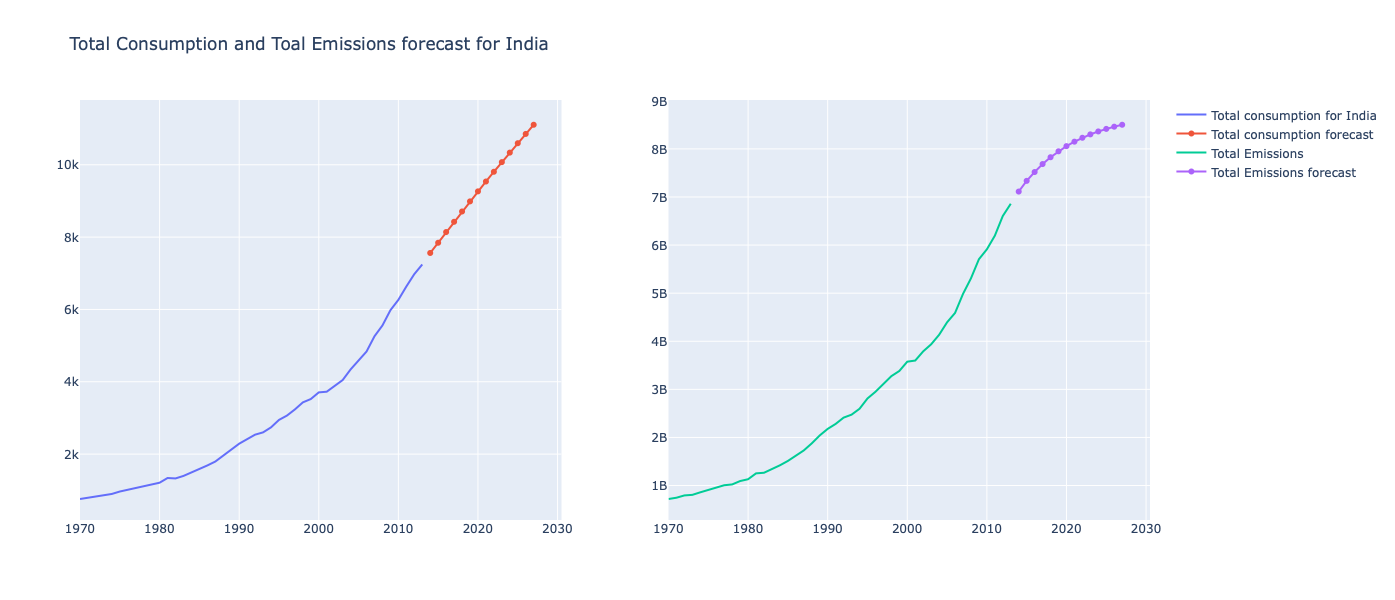

In [26]:
data.forecast_arima("India", 10)

So far we acknowledged India's **consumption has significantly increased** since 1970 together with its **emissions**. But when we have a look at our forecasts we noticed that: 

For the next five years after 2015, consumption is forecasted to keep on increasing linearly, reaching up to 9.2k in 2020.

For the next five years after 2015, emissions are also forecaster to increase reaching up to 8B in 2020.

There are a few reasons why India's consumption is forecasted to keep on increasing. India has a large population, and as the population continues to grow, so does the demand for energy. Additionally, India's economy is growing rapidly, which means that more people are able to afford to purchase energy-consuming products and services. Finally, as India becomes more industrialized, its energy consumption is likely to continue to increase.

There are a number of reasons why India's emissions are forecast to increase over the next five years. First, India's population is expected to continue to grow, which will lead to more people using energy and emitting greenhouse gases. Second, India's economy is expected to continue to grow, which will lead to more industrial activity and emissions. Finally, India is likely to continue to rely heavily on coal for its energy needs, which is a very emissions-intensive fuel.

***

### Conclusion

Now after we have seen in detail the Energy Mix of France, USA and India we would like to round up our insights with a short overall analysis between energy consumption, population, and GDP.

##### Time development Graphs

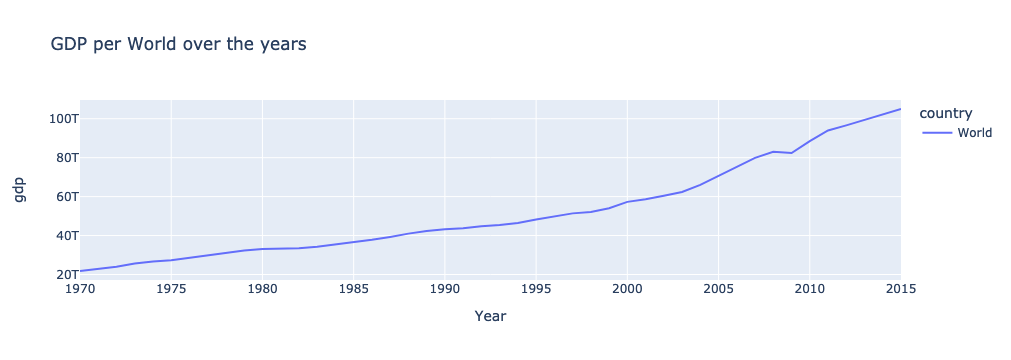

In [27]:
#First, let us check out the development of GDP in those 3 countries   
data.country_gdp("World")

**1.Worldwide GDP has increased.**

There are a number of factors that have contributed to the increase in worldwide GDP since 1970. These include advances in technology, increases in global trade, and population growth.

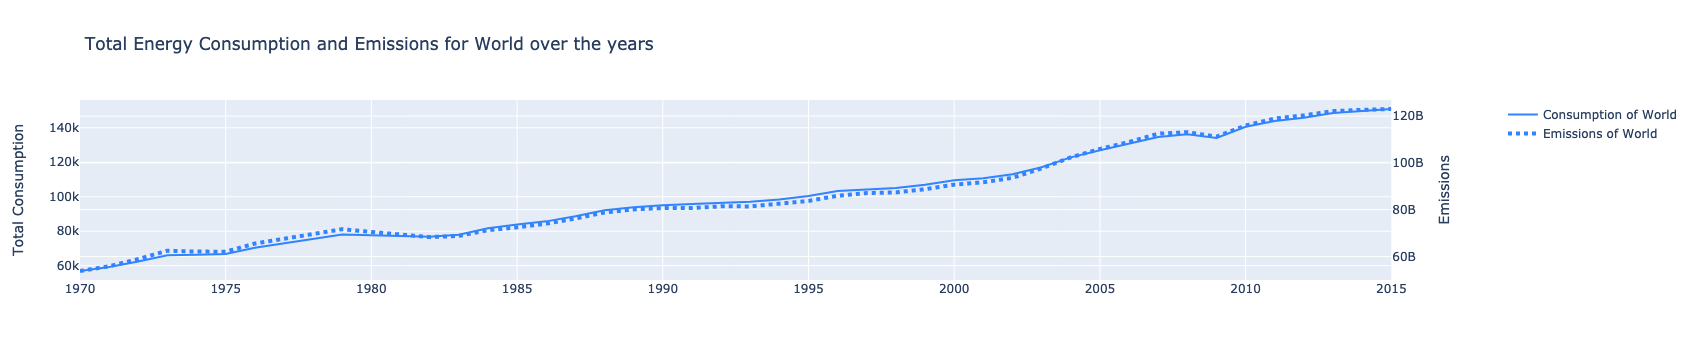

In [28]:
#Then, let us have a look the development of the energy consumption    
data.plot_totalconsumption_emission("World")

**2. Both total energy consumption and emissions for the world have increased since 1970.**

Total energy consumption and emissions have both increased since 1970 because the world population has been growing steadily. More people means more demand for energy, which in turn means more emissions.

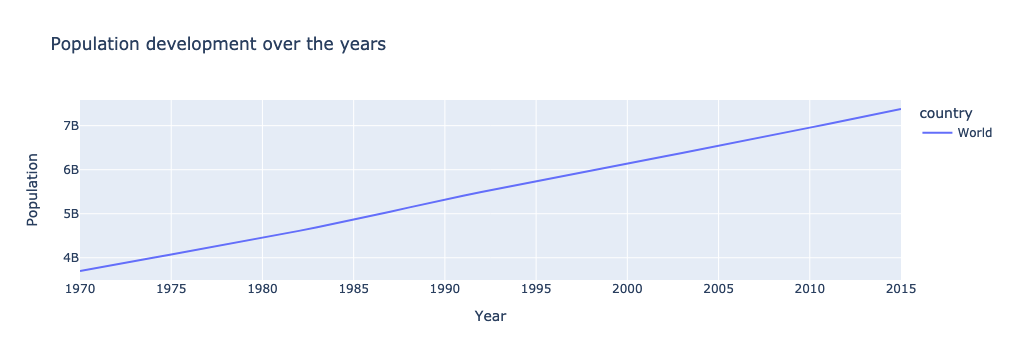

In [29]:
#Finally, how did the population develop?
data.population_dev("World")

**3. Worldwide population over the year increased drastically since 1970.**

The worldwide population has increased drastically since 1970 because of advances in medical care and technology which have led to longer life expectancy and lower infant mortality rates. In developed countries, infant mortality rates have declined and life expectancy has increased. In developing countries, fertility rates have declined as women have gained access to education and contraception.

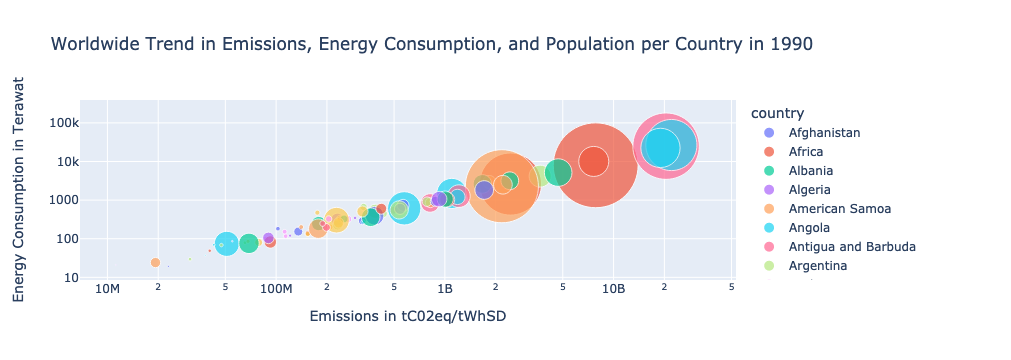

In [30]:
data.emission_scatter(1990)

We can see that over the last years, the population has steadligy increased globally over the last view years. Also energy consumption and GDP have insreased steadly, but seem to be more correlated as both lines take a plunge in the year 2008 - which relates to the global financial crisis. So let´s have an look and see whethere there is some sort of correlation between them in the world - also with regards to the type of energy consumption.

##### Correlation

In [32]:
import numpy as np
import warnings
warnings.simplefilter("ignore")

#create necessary dataframe
overall_df = data.energy_df.loc[:, data.energy_df.columns.str.endswith("consumption")]
overall_df["total"] = overall_df.apply(np.sum, axis=1)
overall_df["year"] = data.energy_df.index
overall_df["country"] = data.energy_df["country"]
overall_df["population"] = data.energy_df["population"]
overall_df["gdp"] = data.energy_df["gdp"]
world_df = overall_df[overall_df.country == "World"].reset_index(drop = True)
#world_df = world_df[["year", "population", "gdp", "total"]]
#run matrix
world_df.corr()


biofuel_consumption  coal_consumption  \
biofuel_consumption                     1.000000          0.929778   
coal_consumption                        0.929778          1.000000   
fossil_fuel_consumption                 0.900040          0.986655   
gas_consumption                         0.885531          0.974595   
hydro_consumption                       0.866407          0.958439   
low_carbon_consumption                  0.815976          0.934784   
nuclear_consumption                     0.551713          0.766774   
oil_consumption                         0.838594          0.941094   
other_renewable_consumption             0.961365          0.974866   
primary_energy_consumption              0.888412          0.981668   
renewables_consumption                  0.947369          0.972557   
solar_consumption                       0.815942          0.657617   
wind_consumption                        0.956643          0.840847   
total                                   0.891252          0.982101   
population                              0.830696          0.946850   
gdp                                     0.946917          0.988685   

                             fossil_fuel_consumption  gas_consumption  \
biofuel_consumption                         0.900040         0.885531   
coal_consumption                            0.986655         0.974595   
fossil_fuel_consumption                     1.000000         0.995570   
gas_consumption                             0.995570         1.000000   
hydro_consumption                           0.982694         0.991685   
low_carbon_consumption                      0.968499         0.984382   
nuclear_consumption                         0.831397         0.863335   
oil_consumption                             0.981458         0.977437   
other_renewable_consumption                 0.974620         0.972398   
primary_energy_consumption                  0.998882         0.998265   
renewables_consumption                      0.976697         0.977398   
solar_consumption                           0.627031         0.619786   
wind_consumption                            0.801641         0.784565   
total                                       0.998904         0.998343   
population                                  0.980478         0.992256   
gdp                                         0.990279         0.984194   

                             hydro_consumption  low_carbon_consumption  \
biofuel_consumption                   0.866407                0.815976   
coal_consumption                      0.958439                0.934784   
fossil_fuel_consumption               0.982694                0.968499   
gas_consumption                       0.991685                0.984382   
hydro_consumption                     1.000000                0.992092   
low_carbon_consumption                0.992092                1.000000   
nuclear_consumption                   0.880891                0.928068   
oil_consumption                       0.964331                0.955695   
other_renewable_consumption           0.958798                0.931999   
primary_energy_consumption            0.989258                0.979188   
renewables_consumption                0.976020                0.950195   
solar_consumption                     0.616301                0.560318   
wind_consumption                      0.767140                0.706190   
total                                 0.989579                0.978941   
population                            0.992127                0.995822   
gdp                                   0.969197                0.943723   

                             nuclear_consumption  oil_consumption  \
biofuel_consumption                     0.551713         0.838594   
coal_consumption                        0.766774         0.941094   
fossil_fuel_consumption                 0.831397         0.981458   
gas_consumption                         0.863335         0.97

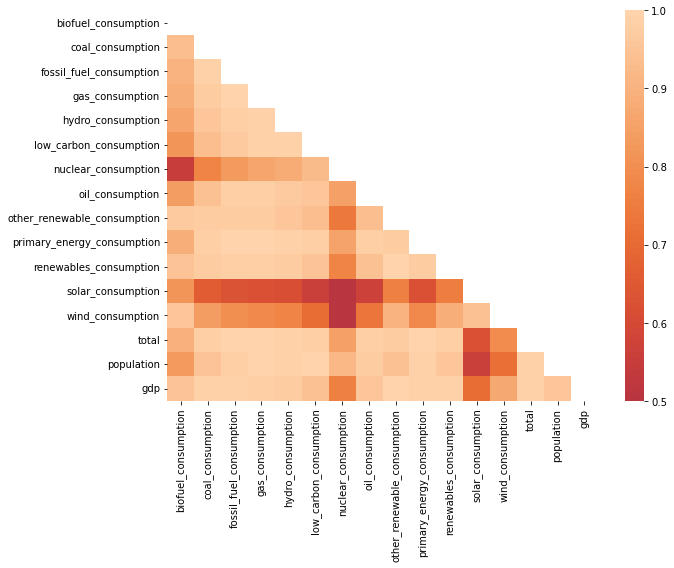

In [33]:
#let´s visualize these findings
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(10,8))

# Let's plot only the bottom half of the matrix
correlation_matrix = world_df.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix, mask=mask, center=0, robust=True, vmin=0.5, vmax=1)

# Auto-compose the image
plt.tight_layout()
plt.show()

##### 
As we can see from above, the total consumption is strongest correlated to the growth of GDP. Interesting to see is also that the nuclear consumption is least correlated with renewable/sustainable energies like solar, wind and biofuel. Overall, the more developed the World becomes the more energy it uses ( also the more population it has). 

***

### Conclusions and Recommendations


Gapminder's World energy emission data shows that the world emited in 2015 about 123B tons of carbon dioxide from the burning of fossil fuels each year. The vast majority of this CO2 emissions come from the energy sector, and the rest from industrial processes and land-use change. The majority of this energy was consumed by the developed world, with the United States consuming the most. The visualizations clearly shows the correlation between energy consumption and emissions. As the world consumes more energy, it emits more greenhouse gases into the atmosphere.
   
The graphics comparisions above have displayed the world's energy consumption and emissions from 1970 to 2015. It is clear that emissions have risen rapidly in line with energy consumption. The world's emissions per person have more than doubled in the last four decades, from 54B tons per year in 1970 to 116B tons per year in 2015.

The data shows that the biggest emitters are the Europe, North America and China. Together, these three regions account for more than half of the world's emissions.

The good news is that emissions have begun to level off in recent years, as countries have made a concerted effort to address climate change. However, more work needs to be done if we are to meet the Paris Agreement's goal of keeping global warming below 2°C.

   Energy consumption and emission are two important factors that everyone should consider when it comes to sustainable development. Energy consumption is the amount of energy used by a certain country or region, while energy emission is the amount of greenhouse gases emitted as a result of energy consumption. While the two factors are related, they are not the same. For instance, as we have seen a country that has a high rate of energy consumption may not have a high rate of energy emission. Conversely, a country that has a low rate of energy consumption may have a high rate of energy emission. There is a general trend of countries that have high rates of energy consumption also having high rates of energy emission. This is because the use of fossil fuels to generate energy leads to the emission of greenhouse gases, which trap heat in the Earth’s atmosphere and contribute to climate change. In addition, there are other factors that contribute to a country’s rate of energy emission. These include the type of energy used, the amount of deforestation, and the types of industry and transportation. Ultimately, it is important to consider both energy consumption and energy emission when it comes to sustainable development. By reducing the amount of energy we consume, we can reduce the amount of greenhouse gases we emit. This, in turn, can help to mitigate climate change and improve the sustainability of our planet.

   The world's energy consumption has grown rapidly over the past few decades. The World Bank reports that in 2012, global energy demand was 500 exajoules (EJ), up from just 300 EJ in 1980. And this growth is projected to continue, with the International Energy Agency (IEA) estimating that by 2040, global energy demand will reach 670 EJ. This increase in demand has led to corresponding growth in energy emissions. The World Bank reports that in 2012, global energy-related carbon dioxide (CO2) emissions were 32.3 gigatons (Gt), up from just 17.5 Gt in 1980. And this growth is projected to continue, with the IEA estimating that by 2040, global energy-related CO2 emissions will reach 45 Gt. This growth in energy demand and emissions is a major contributor to climate change, and it's essential that politicians take action now to reduce our world-wide reliance on fossil fuels and transition to renewable energy sources. As we have seen with the french example in our analysis above, EU's project of carbon tax is defintiely changing the mindsets and at least raising some awareness which have shown to change habits and reduce significantly emissions. 
   
   The overall recommendation for decarbonisation is to reduce greenhouse gas emissions by 80% by 2050. To do so we have 4 main recommendations: 
   - Increase the use of renewable energy sources, such as solar and wind power
   - Develop and deploying more energy-efficient technologies, such as LED lighting and electric vehicles 
   - Encourage the switch to low-carbon transportation options, such as public transportation and cycling 
   - Promote energy conservation measures, such as using less energy or switching to energy-saving appliances
  
 =>Eventually apply in the world a carbon tax to keep on raising awareness. 




***

### Final Statement

A potential relationship between consumption and emissions is that as consumption increases, emissions may also increase. This could be due to a number of factors, such as more energy being used to produce and transport goods, or more waste being generated. However, it is also possible that increased consumption could lead to more efficient production and transport methods, which could actually lead to reduced emissions. Therefore, the relationship between consumption and emissions is complex and dependent on a number of factors.

From the analysis we learned that it is generally believed that GDP is proportional to energy consumption, at least to a certain extent. This is because energy is a key factor in the production of goods and services.

But with an ever growing population, can we only expect energy consumption and emissions to rise ? Not necessarily. 


The data showed that there are a number of ways to decarbonise, but the most effective immediate way is to use renewable energy. This can be done by investing in renewable energy sources, such as solar and wind power, and by using energy efficiency measures. To finish, it is mostly important to raising awareness about the impact of our energy consumption and emissions on the world and find smarter ways and resources to keep on developing worldwide's GDP, regulations are indeed needed to force a more eco-friendly behavior as it has indeed a higher cost.